## Setup

In [ ]:
$ProcessorCount

4

In [ ]:
Unprotect[$ProcessorCount]; $ProcessorCount = 4;

In [ ]:
SetDirectory["~/Documents/Univ/2nd_GW_QCD"];

In [ ]:
SetOptions[{Plot,LogPlot,LogLinearPlot,LogLogPlot},
           {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3]}];
SetOptions[{ListPlot,ListLogPlot,ListLogLinearPlot,ListLogLogPlot},
           {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3],
            Joined->True}];
RGBData = {"#5E81B5","#E19C24","#8FB032","#EB6235","#8778B3","#C56E1A","#5D9EC7","#FFBF00","#A5609D","#929600","#E95536","#6685D9","#F89F13","#BC5B80","#47B66D"};
Color = Map[RGBColor,RGBData];

In [ ]:
ParallelEvaluate[SetOptions[{Plot,LogPlot,LogLinearPlot,LogLogPlot},
           {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3]}];
SetOptions[{ListPlot,ListLogPlot,ListLogLinearPlot,ListLogLogPlot},
           {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3],
            Joined->True}];
RGBData = {"#5E81B5","#E19C24","#8FB032","#EB6235","#8778B3","#C56E1A","#5D9EC7","#FFBF00","#A5609D","#929600","#E95536","#6685D9","#F89F13","#BC5B80","#47B66D"};
Color = Map[RGBColor,RGBData];]

Launching kernels...


## Background

In [ ]:
ai = {1,1.11724,3.12672 10^(-1),-4.68049 10^(-2),-2.65004 10^(-2),-1.19760 10^(-3),1.82812 10^(-4),1.36436 10^(−4),8.55051 10^(−5),1.22840 10^(−5),3.82259 10^(-7),−6.87035 10^(−9)};
bi = {1.43382 10^(−2),1.37559 10^(−2),2.92108 10^(−3),−5.38533 10^(−4),−1.62496 10^(−4),−2.87906 10^(−5),−3.84278 10^(−6),2.78776 10^(−6),7.40342 10^(−7),1.17210 10^(−7),3.72499 10^(−9),−6.74107 10^(−11)};
ci = {1,6.07869 10^(−1),−1.54485 10^(−1),−2.24034 10^(−1),−2.82147 10^(−2),2.90620 10^(−2),6.86778 10^(−3),−1.00005 10^(−3),−1.69104 10^(−4),1.06301 10^(−5),1.69528 10^(−6),−9.33311 10^(−8)};
di = {7.07388 10,9.18011 10,3.31892 10,−1.39779,−1.52558,−1.97857 10^(−2),−1.60146 10^(−1),8.22615 10^(−5),2.02651 10^(−2),−1.82134 10^(−5),7.83943 10^(−5),7.13518 10^(−5)};

In [ ]:
grhohigh[T_] = Sum[ai[[i]]Log[T]^(i-1),{i,12}] / Sum[bi[[i]]Log[T]^(i-1),{i,12}];
gshigh[T_] = grhohigh[T] / (1 + Sum[ci[[i]]Log[T]^(i-1),{i,12}]/Sum[di[[i]]Log[T]^(i-1),{i,12}]);

In [ ]:
Sfit[x_] = 1 + 7/4 Exp[−1.0419x](1 + 1.034x + 0.456426x^2 + 0.0595249x^3);
frho[x_] = Exp[−1.04855x](1 + 1.03757x + 0.508630x^2 + 0.0893988x^3);
brho[x_] = Exp[−1.03149x](1 + 1.03317x + 0.398264x^2 + 0.0648056x^3);
fs[x_] = Exp[−1.04190x](1 + 1.03400x + 0.456426x^2 + 0.0595248x^3);
bs[x_] = Exp[−1.03365x](1 + 1.03397x + 0.342548x^2 + 0.0506182x^3);

In [ ]:
me = 511 10^(-6);
mmu = 0.1056;
mpi0 = 0.13;
mpipm = 0.140;
m1 = 0.5;
m2 = 0.77;
m3 = 1.2;
m4 = 2;

In [ ]:
grholow[T_] = 2.030 + 1.353Sfit[me/T]^(4/3) + 3.495frho[me/T] + 3.446frho[mmu/T] + 1.05brho[mpi0/T] + 2.08brho[mpipm/T] + 4.165brho[m1/T] + 30.55brho[m2/T] + 89.4brho[m3/T] + 8209brho[m4/T];
gslow[T_] = 2.008 + 1.923Sfit[me/T] + 3.442fs[me/T] + 3.468fs[mmu/T] + 1.034bs[mpi0/T] + 2.068bs[mpipm/T] + 4.16bs[m1/T] + 30.55bs[m2/T] + 90bs[m3/T] + 6209bs[m4/T];

In [ ]:
Tth = 0.12;

In [ ]:
grho[T_] := grhohigh[T] /; T>=Tth
grho[T_] := grholow[T] /; T<Tth
grhop[T_] := grhohigh'[T] /; T>=Tth
grhop[T_] := grholow'[T] /; T<Tth
gs[T_] := gshigh[T] /; T>=Tth
gs[T_] := gslow[T] /; T<Tth
gsp[T_] := gshigh'[T] /; T>=Tth
gsp[T_] := gslow'[T] /; T<Tth


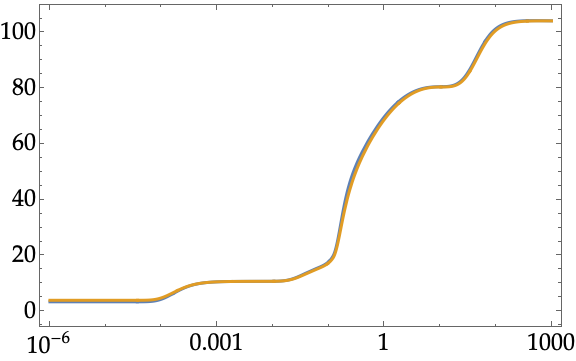

In [ ]:
LogLinearPlot[{grho[T],gs[T]},{T,10^(-6),10^3}] // Quiet

In [ ]:
EoSw[T_] = 4gs[T] / (3grho[T]) - 1;
cs2[T_] = 4(4gs[T] + T gsp[T]) / (3(4grho[T] + T grhop[T])) - 1;


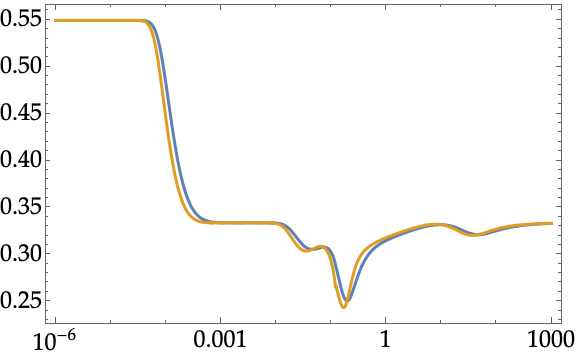

In [ ]:
LogLinearPlot[{EoSw[T],cs2[T]},{T,10^(-6),10^3}] // Quiet

In [ ]:
Tloww = T /. FindRoot[EoSw[T] == 1/3 , {T, 0.01}]
Tlowcs2 = T /. FindRoot[cs2[T] == 1/3, {T, 0.01}]

Out[41]:
 
 
 0.00959631 
 
 Out[42]:
 
 
 0.00835597


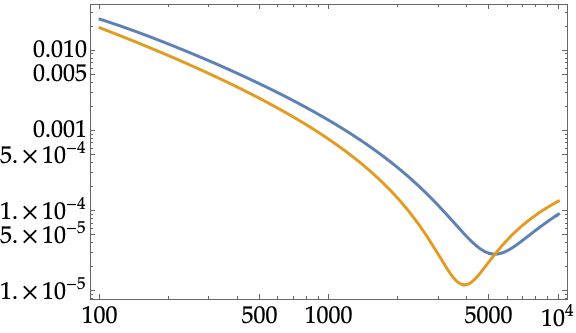

In [ ]:
LogLogPlot[{Abs[1-3EoSw[T]],Abs[1-3cs2[T]]},{T,100,10^4}]

In [ ]:
Thigh = 4000;

In [ ]:
EoSwfix[T_] := EoSw[T] /; Thigh>=T>=Tloww
EoSwfix[T_] := 1/3 /; T<Tloww||T>Thigh
cs2fix[T_] := cs2[T] /; Thigh>=T>=Tlowcs2
cs2fix[T_] := 1/3 /; T<Tlowcs2||T>Thigh


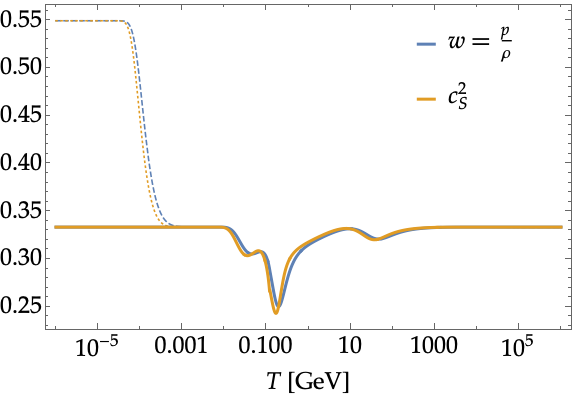

In [ ]:
LogLinearPlot[{EoSw[T],cs2[T],EoSwfix[T],cs2fix[T]},{T,10^(-6),10^6},
              PlotStyle->{Dashed,Dotted,{AbsoluteThickness[3],Color[[1]]},{AbsoluteThickness[3],Color[[2]]}},
              PlotRange->Full,
              PlotLegends->Placed[{None,None,w == p/\[Rho],Subscript[c,S]^2},{0.8,0.8}],
              FrameLabel->{ToString[TraditionalForm[T]]<>" [GeV]",None}] // Quiet


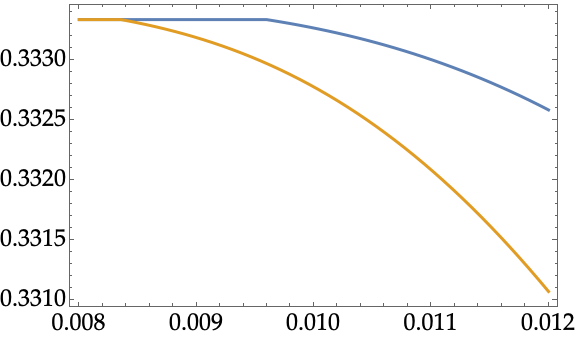

In [ ]:
Plot[{EoSwfix[T],cs2fix[T]},{T,0.008,0.012}]


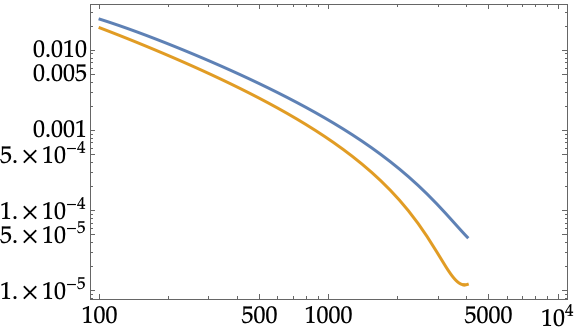

In [ ]:
LogLogPlot[{Abs[1-3EoSwfix[T]],Abs[1-3cs2fix[T]]},{T,100,10^4}]

In [ ]:
Mpl = 2.435 10^18;
KinGeV = 1 / (1.160451812 10^4) 10^(-9)
Mpcinm = 3.08568 10^22;
GeVinminv = 10^9 / (1.97327 10^(-7))
GeVinMpcinv = GeVinminv Mpcinm

Out[49]:
 
 
 -14
8.61733 10 
 
 Out[51]:
 
 
 15
5.06773 10 
 
 Out[52]:
 
 
 38
1.56374 10

In [ ]:
grho0 = grho[10^(-6)] // Quiet
gs0 = gs[10^(-6)] // Quiet
T0 = 2.725 KinGeV

Out[53]:
 
 
 3.383 
 
 Out[54]:
 
 
 3.931 
 
 Out[55]:
 
 
 -13
2.34822 10

In [ ]:
rho[T_] = \[Pi]^2/30 grho[T]T^4;
scalea[T_] = (gs0/gs[T])^(1/3) T0/T;
calH[T_] = Sqrt[scalea[T]^2rho[T]/3/Mpl^2] GeVinMpcinv (*Mpc^-1*);

In [ ]:
Ti = 10^6;
rhoi = rho[Ti]
etai = 1/calH[Ti]
scaleai = scalea[Ti]

Out[60]:
 
 
 25
3.4384 10 
 
 Out[61]:
 
 
 -14
5.84589 10 
 
 Out[62]:
 
 
 -20
7.86804 10

In [ ]:
etaf = 0.1;

In [ ]:
bgsol = NDSolve[{T'[eta] == -\[Pi]/Sqrt[10] gs0^(1/3)T0/Mpl 
                 (1+EoSwfix[T[eta]])grho[T[eta]]^(3/2)T[eta]^2 / (gs[T[eta]]^(1/3)
                                                                  (grhop[T[eta]]T[eta]+4grho[T[eta]])) GeVinMpcinv,
                T[etai] == Ti},
               T[eta],{eta,etai,etaf}, WorkingPrecision->30][[1]]; // Quiet

In [ ]:
Tsol[eta_] = T[eta] /. bgsol;
calHsol[eta_] = calH[Tsol[eta]];
asol[eta_] = scalea[Tsol[eta]];
EoSwsol[eta_] = EoSwfix[Tsol[eta]];
cs2sol[eta_] = cs2fix[Tsol[eta]];
grhosol[eta_] = grho[Tsol[eta]];
gssol[eta_] = gs[Tsol[eta]];


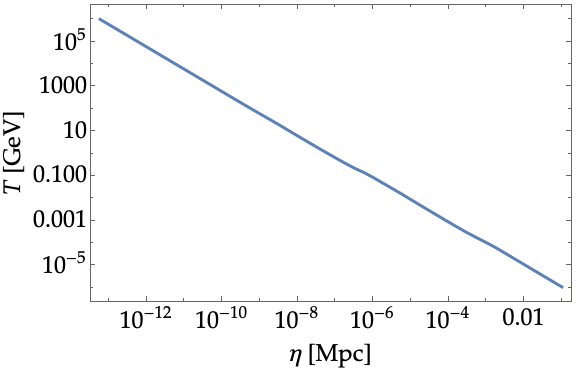

In [ ]:
Tvseta = LogLogPlot[Tsol[eta],{eta,etai,etaf},FrameLabel->{ToString[\[Eta]]<>" [Mpc]",ToString[TraditionalForm[T]]<>" [GeV]"}]

In [ ]:
Export["git/paper/QCD_GW/figYT/T_eta.pdf",Tvseta];


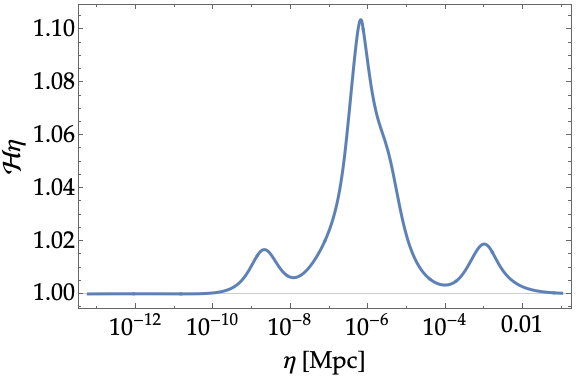

In [ ]:
calHvseta = LogLinearPlot[calHsol[eta]eta,{eta,etai,etaf},PlotRange->Full,GridLines->{None,{1}},FrameLabel->{ToString[\[Eta]]<>" [Mpc]",\[ScriptCapitalH]\[Eta]}]

In [ ]:
Export["git/paper/QCD_GW/figYT/calH_eta.pdf",calHvseta];


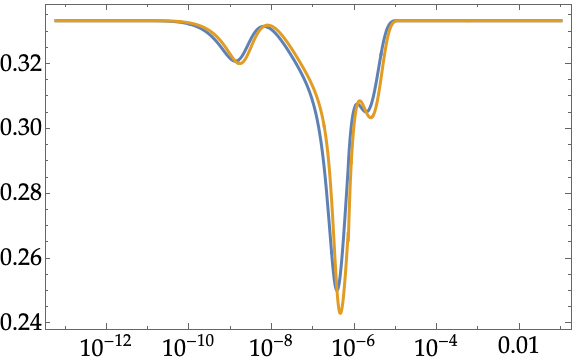

In [ ]:
LogLinearPlot[{EoSwsol[eta],cs2sol[eta]},{eta,etai,etaf},PlotRange->Full]

## Perturbation練習

In [ ]:
k = 10^6;

In [ ]:
xi = 0.01;
xf = 1000;

In [ ]:
ptbsol = NDSolve[{Phi''[x] + 3calHsol[x/k](1+cs2sol[x/k])/k Phi'[x] + (cs2sol[x/k]+3calHsol[x/k]^2(cs2sol[x/k]-EoSwsol[x/k])/k^2)Phi[x] == 0,
                 Phi[xi] == 1, Phi'[xi] == 0},
                  Phi[x],{x,xi,xf}(*, WorkingPrecision->30*), MaxSteps->100000][[1]]; // AbsoluteTiming

In [ ]:
Phisol[x_] = Phi[x] /. ptbsol;


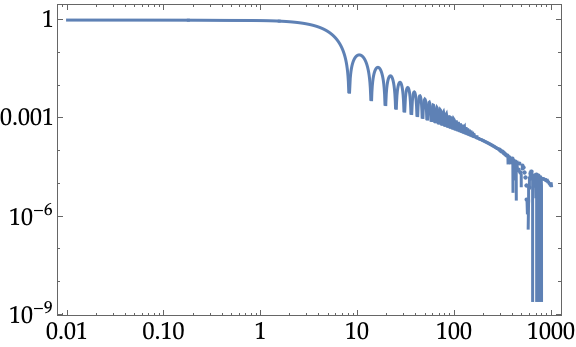

In [ ]:
LogLogPlot[Abs[Phisol[x]],{x,xi,xf},PlotPoints->20]

## Solve scalar PTB

In [ ]:
xi = 0.01;
xf = 1000;

In [ ]:
PhiList[x_] = ParallelTable[{k=10^logk;k,
                            ptbsol = NDSolve[{Phi''[x] + 3calHsol[x/k](1+cs2sol[x/k])/k Phi'[x] + (cs2sol[x/k]+3calHsol[x/k]^2(cs2sol[x/k]-EoSwsol[x/k])/k^2)Phi[x] == 0,
                                        Phi[xi] == 1, Phi'[xi] == 0},
                                        Phi[x],{x,xi,xf}(*, WorkingPrecision->30*), MaxSteps->100000][[1]] // Quiet;
                            Phi[x] /. ptbsol},
                            {logk,4,10,0.01}]; // AbsoluteTiming
Clear[k];
ParallelEvaluate[Clear[k]];

In [ ]:
Export["git/num/PhiList.wdx",PhiList[x]]; // AbsoluteTiming

In [ ]:
k
ParallelEvaluate[k]

Out[86]:
 
 
 k 
 
 Out[87]:
 
 
 {k, k, k, k}

In [ ]:
calPList[x_] = Table[{k=PhiList[x][[i,1]];k,
                      PhiList[x][[i,2]]^2 + D[PhiList[x][[i,2]],x]^2/cs2sol[x/k]},{i,Length[PhiList[x]]}]; // AbsoluteTiming
Clear[k];

In [ ]:
PhiRad[x_] = 9/x^2 (Sin[x/Sqrt[3]]/(x/Sqrt[3]) - Cos[x/Sqrt[3]]);
calPRad[x_] = PhiRad[x]^2 + PhiRad'[x]^2/(1/3);


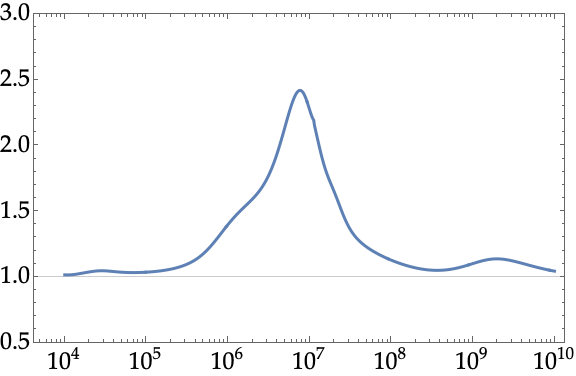

In [ ]:
ListLogLinearPlot[calPList[x].DiagonalMatrix[{1,calPRad[x]^(-1)}] /. {x->8},PlotRange->{0.5,3},GridLines->{None,{1}}]

In [ ]:
PhiList[x_] = Import["git/num/PhiList.wdx"];

In [ ]:
calPList[x_] = Table[{k=PhiList[x][[i,1]];k,
                      PhiList[x][[i,2]]^2 + D[PhiList[x][[i,2]],x]^2/cs2sol[x/k]},{i,Length[PhiList[x]]}]; // AbsoluteTiming
Clear[k];


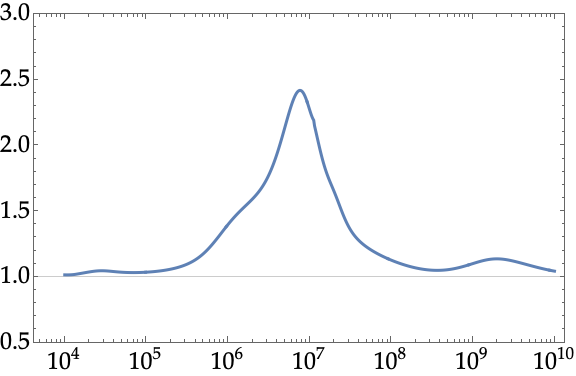

In [ ]:
ListLogLinearPlot[calPList[8].DiagonalMatrix[{1,calPRad[8]^(-1)}],PlotRange->{0.5,3},GridLines->{None,{1}}]

In [ ]:
Length[PhiList[x]]

601

Out[273]:
 
 
 
 
 Out[274]:
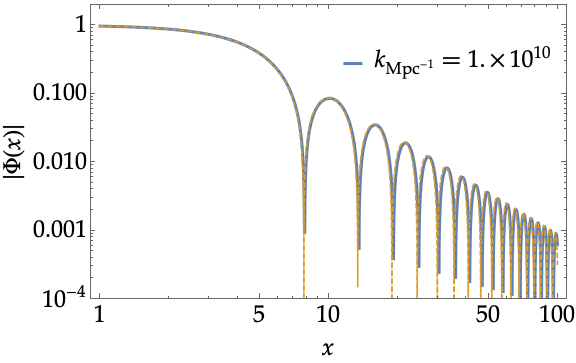

In [ ]:
i = 601;
kref = PhiList[x][[i,1]]
FigPhix = LogLogPlot[{Abs[PhiList[x][[i,2]]],Abs[PhiRad[x]]},{x,1,100},
                     PlotStyle->{AbsoluteThickness[3],Dashed},PlotRange->{10^-4,2},
                     FrameLabel->{x,Abs[\[CapitalPhi][x]]},
                     PlotLegends->Placed[{Subscript[k,Superscript[Mpc,-1]] == ScientificForm[kref,2],None},{0.75,0.8}]]

In [ ]:
Export["git/paper/QCD_GW/figYT/Phix_1e+10.pdf",FigPhix];


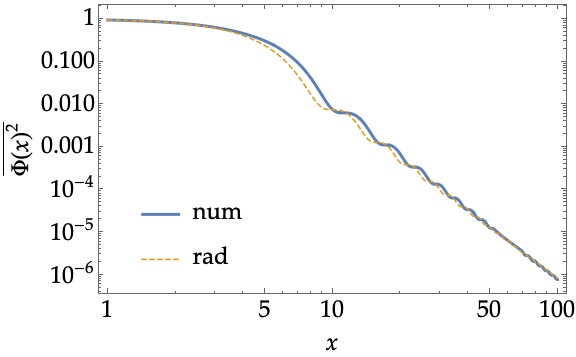

In [ ]:
FigCalP = LogLogPlot[{calPList[x][[290,2]],calPRad[x]},{x,1,100},
                     PlotStyle->{AbsoluteThickness[3],Dashed},
                     FrameLabel->{x,OverBar[\[CapitalPhi][x]^2]},
                     PlotLegends->Placed[{"num","rad"},{0.2,0.2}]]

In [ ]:
Export["git/paper/QCD_GW/figYT/calPPhi.pdf",FigCalP];


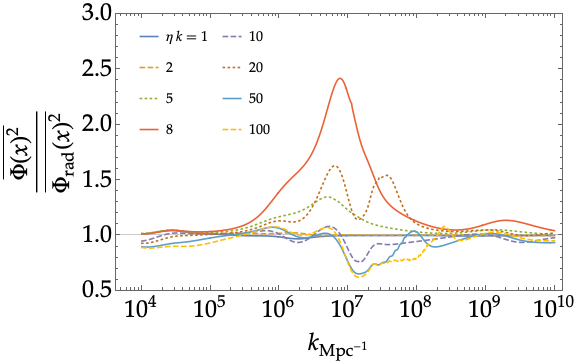

In [ ]:
FigSpec = ListLogLinearPlot[{(calPList[x].DiagonalMatrix[{1,calPRad[x]^(-1)}] /. {x->1}),
                             (calPList[x].DiagonalMatrix[{1,calPRad[x]^(-1)}] /. {x->2}),
                             (calPList[x].DiagonalMatrix[{1,calPRad[x]^(-1)}] /. {x->5}),
                             (calPList[x].DiagonalMatrix[{1,calPRad[x]^(-1)}] /. {x->8}),
                             (calPList[x].DiagonalMatrix[{1,calPRad[x]^(-1)}] /. {x->10}),
                             (calPList[x].DiagonalMatrix[{1,calPRad[x]^(-1)}] /. {x->20}),
                             (calPList[x].DiagonalMatrix[{1,calPRad[x]^(-1)}] /. {x->50}),
                             (calPList[x].DiagonalMatrix[{1,calPRad[x]^(-1)}] /. {x->100})},
                            PlotRange->{0.5,3},GridLines->{None,{1}},
                            PlotStyle->{Automatic,Dashed,Dotted,Automatic,Dashed,Dotted,Automatic,Dashed},
                            PlotLegends->Placed[LineLegend[{k \[Eta] == 1,2,5,8,10,20,50,100},
                                                           LegendLayout->{"Column",2},
                                                           LabelStyle->Directive[Larger,Black,FontFamily->"Palatino"],
                                                           LegendMarkerSize->20],{0.2,0.75}],
                            FrameLabel->{Subscript[k,Superscript[Mpc,-1]],
                                         OverBar[\[CapitalPhi][x]^2]/OverBar[Subscript[\[CapitalPhi],rad][x]^2]}
                           ]

In [ ]:
Export["git/paper/QCD_GW/figYT/Phi_spectrum.pdf",FigSpec];

In [ ]:
FigSpecList = Table[ListLogLinearPlot[calPList[10^logx].DiagonalMatrix[{1,calPRad[10^logx]^(-1)}],
                                              PlotRange->{0.5,3},GridLines->{None,{1}},
                                              PlotLegends->Placed[{k \[Eta] == 10^logx},{0.8,0.8}],
                                              FrameLabel->{Subscript[k,Superscript[Mpc,-1]],OverBar[\[CapitalPhi][x]^2]/OverBar[Subscript[\[CapitalPhi],rad][x]^2]}
                                             ],{logx,0,2,0.01}]; // AbsoluteTiming

In [ ]:
Export["Phi_spectrum_4-10_py.gif",FigSpecList]; // AbsoluteTiming

## Monochromatic練習

In [ ]:
PhiList[x_] = Import["git/num/PhiList.wdx"]; // AbsoluteTiming

In [ ]:
xi = 0.01;
xf = 1000;
k7 = PhiList[x][[301,1]]
Phi7[x_] = PhiList[x][[301,2]];
Phi7p[x_] = D[Phi7[x],x];

7
1. 10


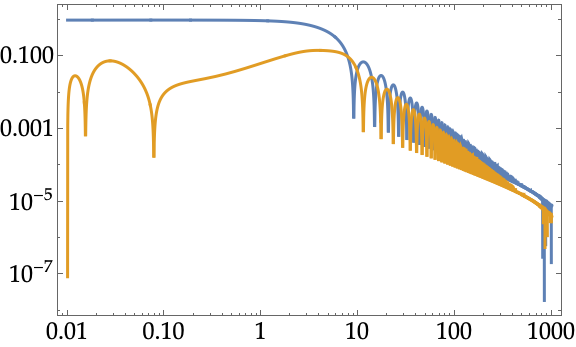

In [ ]:
LogLogPlot[{Abs[Phi7[x]],Abs[Phi7p[x]]},{x,xi,xf}]

In [ ]:
Is7[x_] := NIntegrate[asol[xp/k7]/(xp/k7) xp Sin[xp]
                     (2Phi7[xp]^2 + 4/3/(1+EoSwsol[xp/k7]) (Phi7[xp] + k7/calHsol[xp/k7] Phi7p[xp])^2) ,{xp,xi,x}(*,
                     WorkingPrecision->30*)]
Ic7[x_] := NIntegrate[asol[xp/k7]/(xp/k7) xp Cos[xp]
                     (2Phi7[xp]^2 + 4/3/(1+EoSwsol[xp/k7]) (Phi7[xp] + k7/calHsol[xp/k7] Phi7p[xp])^2) ,{xp,xi,x}(*,
                     WorkingPrecision->30*)]
I2bar7[x_] := (Is7[x]^2+Ic7[x]^2)/2

In [ ]:
Az = 0.01;
OGW7[x_] := 8/243 (asol[x/k7]calHsol[x/k7])^(-2) (1-1/4)^2 I2bar7[x] Az^2

In [ ]:
OGW7List = ParallelTable[{10^logx, OGW7[10^logx] // Quiet}, {logx,Log10[xi],Log10[xf],0.01}]; // AbsoluteTiming

Launching kernels...



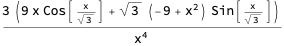

In [ ]:
aRad[eta_] = scaleai(eta/etai);
PhiRad[x_] = 9/x^2 (Sin[x/Sqrt[3]]/(x/Sqrt[3]) - Cos[x/Sqrt[3]]);
PhiRadp[x_] = D[PhiRad[x],x] // Simplify

In [ ]:
Is7Rad[x_] = Integrate[scaleai/etai xp Sin[xp]
                     (2PhiRad[xp]^2 + (PhiRad[xp] + xp PhiRadp[xp])^2) ,{xp,xi,x}] // Simplify; 
Ic7Rad[x_] = Integrate[scaleai/etai xp Cos[xp]
                     (2PhiRad[xp]^2 + (PhiRad[xp] + xp PhiRadp[xp])^2) ,{xp,xi,x}] // Simplify;
I2bar7Rad[x_] = Abs[(Is7Rad[x]^2+Ic7Rad[x]^2)/2];

In [ ]:
OGW7Rad[x_] = 8/243 (aRad[x/k7]/(x/k7))^(-2) (1-1/4)^2 I2bar7Rad[x] Az^2;


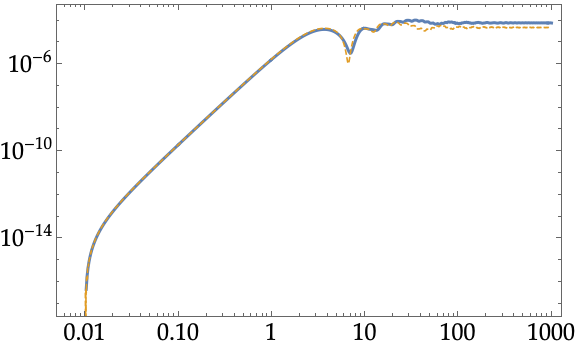

In [ ]:
Show[ListLogLogPlot[OGW7List], LogLogPlot[OGW7Rad[x],{x,xi,xf},PlotStyle->{Color[[2]],Dashed}]]

## Monochromatic Spectrum

In [ ]:
PhiList[x_] = Import["git/num/PhiList.wdx"]; // AbsoluteTiming

In [ ]:
xi = 0.01;
xf = 1000;

In [ ]:
PhiMode[x_] = Table[PhiList[x][[i,2]],{i,Length[PhiList[x]]}];
PhipMode[x_] = Table[D[PhiMode[x][[i]],x],{i,Length[PhiMode[x]]}];
kList = Table[PhiList[x][[i,1]],{i,Length[PhiList[x]]}];

In [ ]:
Is[i_,x_] := NIntegrate[asol[xp/kList[[i]]]/(xp/kList[[i]]) xp Sin[xp]
                     (2PhiMode[xp][[i]]^2 + 4/3/(1+EoSwsol[xp/kList[[i]]]) 
                      (PhiMode[xp][[i]] + kList[[i]]/calHsol[xp/kList[[i]]] PhipMode[xp][[i]])^2) ,{xp,xi,x}]
Ic[i_,x_] := NIntegrate[asol[xp/kList[[i]]]/(xp/kList[[i]]) xp Cos[xp]
                     (2PhiMode[xp][[i]]^2 + 4/3/(1+EoSwsol[xp/kList[[i]]]) 
                      (PhiMode[xp][[i]] + kList[[i]]/calHsol[xp/kList[[i]]] PhipMode[xp][[i]])^2) ,{xp,xi,x}]
I2bar[i_,x_] := (Is[i,x]^2+Ic[i,x]^2)/2

In [ ]:
Az = 0.01;
Or0h2 = 4.2 10^(-5);
OGWc[i_,x_] := 8/243 (asol[x/kList[[i]]]calHsol[x/kList[[i]]])^(-2) (1-1/4)^2 I2bar[i,x] Az^2

In [ ]:
dlogx = 0.01;

In [ ]:
OGW4List = ParallelTable[{10^logx, OGWc[1,10^logx] // Quiet}, {logx,Log10[xi],Log10[xf],dlogx}]; // AbsoluteTiming
OGW5List = ParallelTable[{10^logx, OGWc[101,10^logx] // Quiet}, {logx,Log10[xi],Log10[xf],dlogx}]; // AbsoluteTiming
OGW6List = ParallelTable[{10^logx, OGWc[201,10^logx] // Quiet}, {logx,Log10[xi],Log10[xf],dlogx}]; // AbsoluteTiming
OGW7List = ParallelTable[{10^logx, OGWc[301,10^logx] // Quiet}, {logx,Log10[xi],Log10[xf],dlogx}]; // AbsoluteTiming
OGW8List = ParallelTable[{10^logx, OGWc[401,10^logx] // Quiet}, {logx,Log10[xi],Log10[xf],dlogx}]; // AbsoluteTiming
OGW9List = ParallelTable[{10^logx, OGWc[501,10^logx] // Quiet}, {logx,Log10[xi],Log10[xf],dlogx}]; // AbsoluteTiming
OGW10List = ParallelTable[{10^logx, OGWc[601,10^logx] // Quiet}, {logx,Log10[xi],Log10[xf],dlogx}]; // AbsoluteTiming

Out[104]:
 
 
 
 
 Out[105]:
 
 
 
 
 Out[106]:
 
 
 
 
 Out[107]:
 
 
 
 
 Out[108]:
 
 
 
 
 Out[109]:
 
 
 
 
 Out[110]:

In [ ]:
Export["git/num/OGW4List.dat",OGW4List];
Export["git/num/OGW5List.dat",OGW5List];
Export["git/num/OGW6List.dat",OGW6List];
Export["git/num/OGW7List.dat",OGW7List];
Export["git/num/OGW8List.dat",OGW8List];
Export["git/num/OGW9List.dat",OGW9List];
Export["git/num/OGW10List.dat",OGW10List];

In [ ]:
Clear[k]


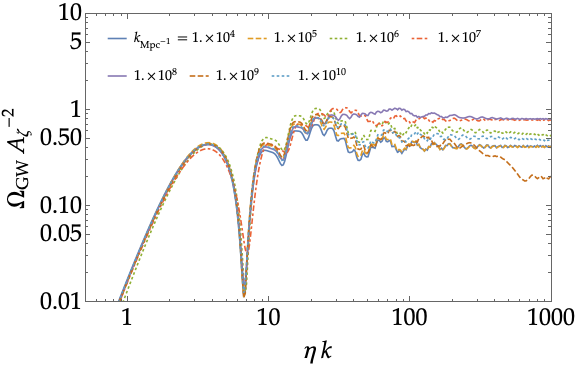

In [ ]:
OGWvsEtaFig = ListLogLogPlot[{OGW4List.{{1,0},{0,Az^-2}},OGW5List.{{1,0},{0,Az^-2}},OGW6List.{{1,0},{0,Az^-2}},OGW7List.{{1,0},{0,Az^-2}},OGW8List.{{1,0},{0,Az^-2}},
                OGW9List.{{1,0},{0,Az^-2}},OGW10List.{{1,0},{0,Az^-2}}},
               PlotStyle->{Automatic,Dashed,Dotted,DotDashed,Automatic,Dashed,Dotted},
               PlotRange->{{0.5,1000},{10^-2,10}},
               PlotLegends->Placed[LineLegend[{Subscript[k,Superscript[Mpc,-1]] == ScientificForm[1.0 10^4,2],ScientificForm[1.0 10^5,2],
                                               1.0 10^6,1.0 10^7,1.0 10^8,1.0 10^9,1.0 10^10},
                                              LabelStyle->Directive[Larger,Black,FontFamily->"Palatino"],LegendMarkerSize->20,
                                              LegendLayout->{"Row",2}],{0.45,0.85}], 
               FrameLabel->{k \[Eta],Subscript[\[CapitalOmega],GW]Superscript[Subscript[A,\[Zeta]],-2]}]

In [ ]:
Export["git/paper/QCD_GW/figYT/OGWvsEta.pdf",OGWvsEtaFig];

In [ ]:
OGW0h2[i_] := (gs0/gssol[xf/kList[[i]]])^(4/3) grhosol[xf/kList[[i]]]/grho0 Or0h2 OGWc[i,xf]

In [ ]:
OGW0h2[301] // Quiet

-9
2.737 10

In [ ]:
OGW0h2List = ParallelTable[{kList[[i]],OGW0h2[i] // Quiet},{i,1,Length[kList]}]; // AbsoluteTiming

In [ ]:
Export["git/num/OGW0h2List.dat",OGW0h2List];


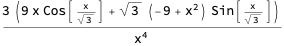

In [ ]:
PhiRad[x_] = 9/x^2 (Sin[x/Sqrt[3]]/(x/Sqrt[3]) - Cos[x/Sqrt[3]]);
PhiRadp[x_] = D[PhiRad[x],x] // Simplify

In [ ]:
IsRad[i_,x_] := NIntegrate[asol[xp/kList[[i]]]/(xp/kList[[i]]) xp Sin[xp]
                     (2PhiRad[xp]^2 + (PhiRad[xp] + xp PhiRadp[xp])^2) ,{xp,xi,x}]
IcRad[i_,x_] := NIntegrate[asol[xp/kList[[i]]]/(xp/kList[[i]]) xp Cos[xp]
                     (2PhiRad[xp]^2 + (PhiRad[xp] + xp PhiRadp[xp])^2) ,{xp,xi,x}]
I2barRad[i_,x_] := (IsRad[i,x]^2+IcRad[i,x]^2)/2

In [ ]:
OGWRad[i_,x_] := 8/243 (asol[x/kList[[i]]]calHsol[x/kList[[i]]])^(-2) (1-1/4)^2 I2barRad[i,x] Az^2;
OGW0Radh2[i_] := (gs0/gssol[xf/kList[[i]]])^(4/3) grhosol[xf/kList[[i]]]/grho0 Or0h2 OGWRad[i,xf];

In [ ]:
OGW0Radh2[301] // Quiet

-9
1.182 10

In [ ]:
OGW0Radh2List = ParallelTable[{kList[[i]],OGW0Radh2[i] // Quiet},{i,1,Length[kList]}]; // AbsoluteTiming

In [ ]:
Export["git/num/OGW0Radh2List.dat",OGW0Radh2List];


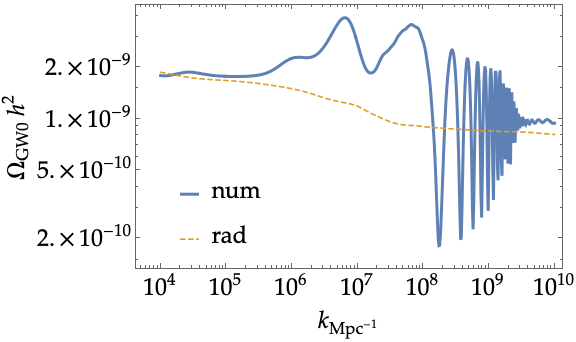

In [ ]:
OGW0h2SpecFig = ListLogLogPlot[{OGW0h2List,OGW0Radh2List}, 
                    FrameLabel->{Subscript[k,Superscript[Mpc,-1]],Subscript[\[CapitalOmega],GW0]Superscript[h,2]},
                    PlotLegends->Placed[LineLegend[{"num","rad"},LegendMarkerSize->20],
                                        {0.2,0.2}],
                    PlotStyle->{AbsoluteThickness[3],Dashed}
                   ]

In [ ]:
Export["git/paper/QCD_GW/figYT/OGW0h2Spec.pdf",OGW0h2SpecFig];

## Linear GW

In [ ]:
xi = 0.01;
xf = 1000;

In [ ]:
k = 10^7;
Gsol1 = NDSolve[{G''[eta]+(k^2-(1-3EoSwsol[eta])/2*calHsol[eta]^2)G[eta]==0,G[etai]==1,G'[etai]==0},
                 G[eta],{eta,etai,xf/k},MaxSteps->10^5]; // AbsoluteTiming
Gsol2 = NDSolve[{G''[eta]+(k^2-(1-3EoSwsol[eta])/2*calHsol[eta]^2)G[eta]==0,G'[etai]==k,G[etai]==0},
                 G[eta],{eta,etai,xf/k},MaxSteps->10^5]; // AbsoluteTiming

Out[92]:
 
 
 
 
 Out[93]:


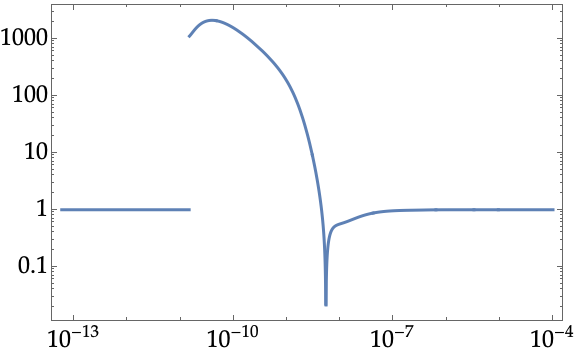

In [ ]:
LogLogPlot[Abs[1-(1-3EoSwsol[eta])/2*calHsol[eta]^2/k^2],{eta,etai,xf/k}]

In [ ]:
G1[eta_] = G[eta]/.Gsol1;
G2[eta_] = G[eta]/.Gsol2;
G1p[eta_] = D[G1[eta],eta];
G2p[eta_] = D[G2[eta],eta];


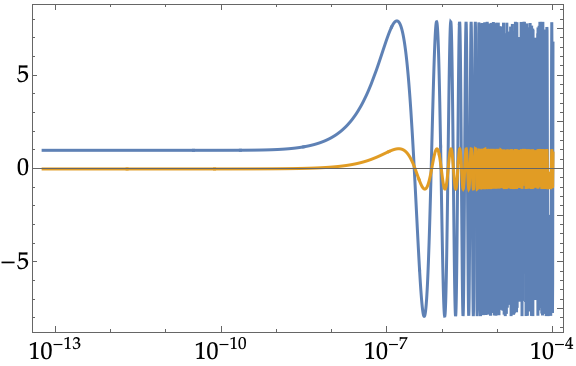

In [ ]:
LogLinearPlot[{G1[eta],G2[eta]},{eta,etai,xf/k},PlotRange->Full]

In [ ]:
GreenG[eta_,etap_] = (G1[eta]G2[etap]-G2[eta]G1[etap])/(G1p[etap]G2[etap]-G1[etap]G2p[etap]);


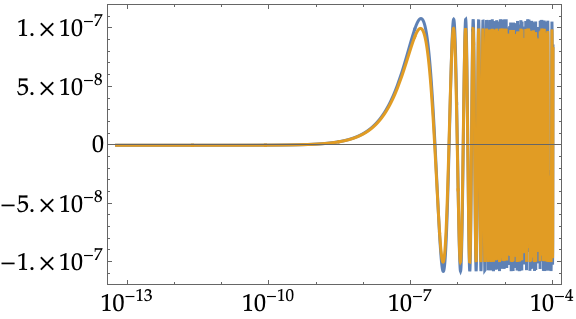

In [ ]:
LogLinearPlot[{GreenG[eta,etai],1/k Sin[k(eta-etai)]},{eta,etai,xf/k},PlotRange->Full]